In [63]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score, log_loss

In [ ]:
gcn_scens = ["13", "24", "35", "46"]
cnn_scens = ["13", "24", "46"]
gcn_dict = {i: pd.read_csv(f"/work/users/l/s/lswhiteh/SeqOrSwim/src/models/cnn_training/dylanwork/mt{i}_val.csv", sep=",") for i in gcn_scens}
cnn_dict = {i: pd.read_csv(f"/work/users/l/s/lswhiteh/SeqOrSwim/src/models/cnn_training/intro/mt{i}_n512_1d_01_1d_results.csv", sep="\t") for i in cnn_scens}

In [ ]:
print(gcn_dict)


In [ ]:
print(cnn_dict)

In [ ]:
for i in gcn_dict:
    gcn_dict[i]["pred"] = np.argmax(gcn_dict[i][["ab", "ba", "none"]], axis=1)
    print(gcn_dict[i]["y"])


In [64]:
gcn_accs = [accuracy_score(gcn_dict[i]["y"], gcn_dict[i]["pred"]) for i in gcn_dict]
cnn_accs = [accuracy_score(cnn_dict[i]["true"], cnn_dict[i]["pred"]) for i in cnn_dict]
gcn_ce = [log_loss(gcn_dict[i]["y"], gcn_dict[i][["ab", "ba", "none"]]) for i in gcn_dict]
cnn_ce = [log_loss(cnn_dict[i]["true"], cnn_dict[i][["ab", "ba", "none"]]) for i in cnn_dict]

Text(0.5, 0, 'Introgression Scenario')

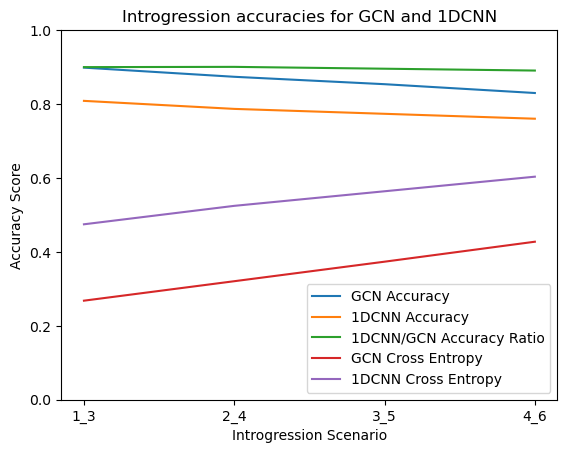

In [66]:
plt.plot(["_".join(i) for i in gcn_scens], gcn_accs, label="GCN Accuracy")
plt.plot(["_".join(i) for i in cnn_scens], cnn_accs, label="1DCNN Accuracy")
plt.plot(["_".join(i) for i in cnn_scens], [i/j for i,j in zip(cnn_accs, gcn_accs)], label="1DCNN/GCN Accuracy Ratio")
plt.plot(["_".join(i) for i in gcn_scens], gcn_ce, label="GCN Cross Entropy")
plt.plot(["_".join(i) for i in cnn_scens], cnn_ce, label="1DCNN Cross Entropy")
plt.legend()
plt.ylim(0.0, 1)
plt.title("Introgression accuracies for GCN and 1DCNN")
plt.ylabel("Accuracy Score")
plt.xlabel("Introgression Scenario")